# SMOTE for Credit Card Fraud

We use the synthetic minority oversampling technique (SMOTE) to improve classification of fraudulent credit card transactions.

In [10]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot
from numpy import where, mean

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
from sklearn import model_selection, svm

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# import pandas_profiling

# Download the data from 
# https://www.kaggle.com/mlg-ulb/creditcardfraud

# read the data
df = pd.read_csv("creditcard.csv")

Testing data: Counter({0: 56878, 1: 84}) 
Training data: Counter({0: 227437, 1: 408})


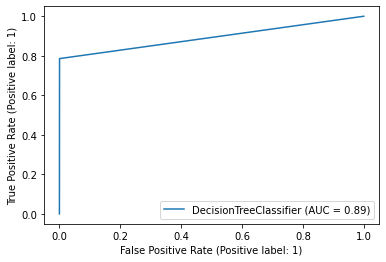

In [22]:
# extract features and classes from dataframe
X = df.drop("Class", axis=1).to_numpy()
y = df["Class"].to_numpy()

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=2)

counter_test = Counter(y_test)
counter_train = Counter(y_train)

print("Testing data: {} \nTraining data: {}".format(counter_test, counter_train))

# define model
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

plot_roc_curve(model, X_test, y_test)

Counter({0: 9097, 1: 6823})


0.9378751764428125

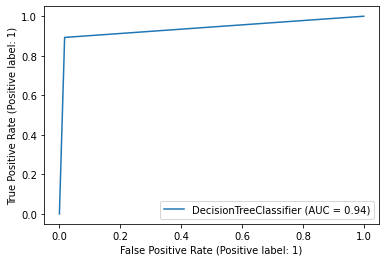

In [38]:
from sklearn.metrics import *

# Define pipeline
over = SMOTE(sampling_strategy=0.03)
under = RandomUnderSampler(sampling_strategy=0.75)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X, y = pipeline.fit_resample(X_train, y_train)

# Summarize the new class distribution
counter = Counter(y)
print(counter)

# Define model
model = DecisionTreeClassifier()
model.fit(X, y)

y_pred = model.predict(X_test)

plot_roc_curve(model, X_test, y_test)

roc_auc_score(y_test, y_pred, average=None)